#Testing dump of HRRR

f = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']
a, b, c, d = f.shape[0], f.shape[1], f.shape[2], f.shape[3]

dataset = Dataset('PBLHeight%02d.nc' %num, 'w', format = 'NETCDF4')                
                dataset.createDimension('x', d)
                dataset.createDimension('y', c)
                dataset.createDimension('time', b)
                dataset.createDimension('reftime', a)  
                dataset.createDimension('units', None)
                dataset.createVariable('temp', 'f4', ('reftime', 'time', 'x', 'y', 'units',))
              
                np.arange(0, b, 0.5) #times
                np.arange(0, a, 0.5) #reftimes
                np.arange(575843.432, 675843.432, 100) #SGP region x
                np.arange(3989327.467, 4089327.467, 100) #SGP region y


In [1]:
import netCDF4
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, pyproj
#from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import time
import datetime
import pyart
%matplotlib inline 

In [2]:
hrrr_dap = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/HRRR/CONUS_3km/wrfprs')
ncep_hrrr = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/NCEP/HRRR/CONUS_2p5km/TwoD')
keys_want =['Planetary_boundary_layer_height_surface',
           'u-component_of_wind_height_above_ground',
           'v-component_of_wind_height_above_ground']
arrays = {}
for key in keys_want:
    print key
    arrays.update({key: ncep_hrrr.variables[key]})

dataset = netCDF4.Dataset('/data/testme.nc', 'w', format = 'NETCDF4')                

for dim in ncep_hrrr.dimensions.keys():
    print dim, len(ncep_hrrr.dimensions[dim])
    dataset.createDimension(dim, len(ncep_hrrr.dimensions[dim]))
                            
tt = dataset.createVariable('time', 'f4', ('reftime', 'time'))
tt[:] = ncep_hrrr.variables['time'][:]
tt.units = ncep_hrrr.variables['time'].units

var_dict = {}

for key in keys_want:
    print key
    print ncep_hrrr.variables[key].shape
    var_dict.update({key: dataset.createVariable(key, 'f4',ncep_hrrr.variables[key].dimensions )})
    print var_dict[key].shape
    for i in range(5):#range(arrays[key].shape[0]):
        var_dict[key][i,:] = arrays[key][i, :]
    var_dict[key].units = ncep_hrrr.variables[key].units

dataset.close()

Planetary_boundary_layer_height_surface
u-component_of_wind_height_above_ground
v-component_of_wind_height_above_ground
height_above_ground 1
height_above_ground1 1
height_above_ground2 1
height_above_ground3 2
height_above_ground_layer 2
height_above_ground_layer1 2
height_above_ground_layer1_bounds_1 2
height_above_ground_layer2 1
height_above_ground_layer2_bounds_1 2
height_above_ground_layer3 1
height_above_ground_layer3_bounds_1 2
height_above_ground_layer_bounds_1 2
isobaric 5
isobaric1 4
isobaric_layer 1
isobaric_layer_bounds_1 2
pressure_difference_layer 2
pressure_difference_layer1 1
pressure_difference_layer1_bounds_1 2
pressure_difference_layer2 1
pressure_difference_layer2_bounds_1 2
pressure_difference_layer3 1
pressure_difference_layer3_bounds_1 2
pressure_difference_layer_bounds_1 2
reftime 93
sigma_layer 1
sigma_layer_bounds_1 2
time 16
time1 15
time1_bounds_2 2
time2 15
x 2145
y 1377
Planetary_boundary_layer_height_surface
(93, 16, 1377, 2145)
(93, 16, 1377, 2145)
u-co

In [3]:
my_new_object = netCDF4.Dataset('/data/testme.nc', 'r')


In [4]:
print my_new_object.variables['u-component_of_wind_height_above_ground'].shape
print my_new_object.variables['u-component_of_wind_height_above_ground']

(93, 16, 2, 1377, 2145)
<type 'netCDF4.Variable'>
float32 u-component_of_wind_height_above_ground(reftime, time, height_above_ground3, y, x)
    units: m/s
unlimited dimensions: 
current shape = (93, 16, 2, 1377, 2145)
filling on, default _FillValue of 9.96920996839e+36 used



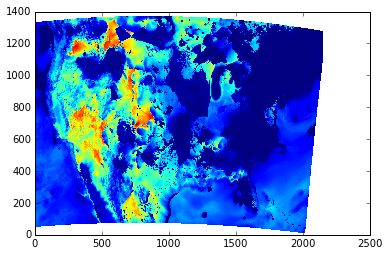

In [5]:
plt.pcolormesh(my_new_object.variables['Planetary_boundary_layer_height_surface'][0,0,:,:])

In [40]:
mmm= arrays['Planetary_boundary_layer_height_surface'][0, :]

In [41]:
print mmm.shape

(16, 1377, 2145)
